# Case Study: Generate Synthetic Images With DCGANs

<img src="https://github.com/ijoseff/ijoseff.github.io/blob/master/assets/img/portfolio/gans.png?raw=true" width = "800" height = "400" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Review" data-toc-modified-id="Review-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Review</a></span></li><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Load-And-Preprocess-The-Data" data-toc-modified-id="Load-And-Preprocess-The-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load And Preprocess The Data</a></span></li><li><span><a href="#Create-Batches-Of-Training-Data" data-toc-modified-id="Create-Batches-Of-Training-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Create Batches Of Training Data</a></span></li><li><span><a href="#Build-The-Generator-Network-For-DCGAN" data-toc-modified-id="Build-The-Generator-Network-For-DCGAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Build The Generator Network For DCGAN</a></span></li><li><span><a href="#Build-The-Discriminator-Network-For-DCGAN" data-toc-modified-id="Build-The-Discriminator-Network-For-DCGAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Build The Discriminator Network For DCGAN</a></span></li><li><span><a href="#Compile-The-Deep-Convolutional-Generative-Adversarial-Network-(DCGAN)" data-toc-modified-id="Compile-The-Deep-Convolutional-Generative-Adversarial-Network-(DCGAN)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Compile The Deep Convolutional Generative Adversarial Network (DCGAN)</a></span></li><li><span><a href="#Define-Training-Procedure" data-toc-modified-id="Define-Training-Procedure-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Define Training Procedure</a></span></li><li><span><a href="#Train-DCGAN" data-toc-modified-id="Train-DCGAN-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Train DCGAN</a></span></li><li><span><a href="#Generate-Synthetic-Images-With-DCGAN" data-toc-modified-id="Generate-Synthetic-Images-With-DCGAN-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Generate Synthetic Images With DCGAN</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

Generative Adversarial Networks (GANs) are one of the most interesting ideas in computer science today. Two models are trained simultaneously by an adversarial process. A generator ("The artist") learns to create images that look real, while a discriminator ("The art critic") learns to tell real images apart from fakes. In this project, Generative Adversarial Networks (GANs) will be build and train a Deep Convolutional GAN (DCGAN) with Keras to generate images of fashionable clothes. Using the Keras Sequential API with Tensorflow 2 as the backend.

**Dataset:**
 - Fashion MNIST Dataset

## Review

<img src="https://github.com/ijoseff/Generate-Synthetic-Images/blob/master/gans1.png?raw=true" width = "800" height = "400" />

## Import Libraries

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import plot_utils
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

# Check TensorFlow version
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.3.0


## Load And Preprocess The Data

In [2]:
# Load fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize dataset
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

4423680/4422102 [==============================] - 0s 0us/step


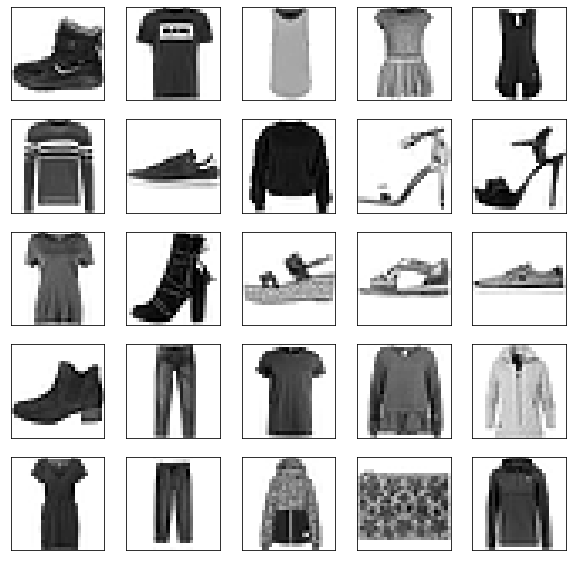

In [3]:
# Plot figure size
plt.figure(figsize = (10,10))

# Show image with binary colors
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap = plt.cm.binary)
plt.show()

## Create Batches Of Training Data

In [4]:
# Set batch size
batch_size = 32

# This dataset fills a buffer with buffer_size elements, 
# Then randomly samples elements from this buffer, replacing the selected elements with new elements.
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(1000)

# Combines consecutive elements of this dataset into batches.
# Creates a Dataset that prefetches elements from this dataset
dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)

## Build The Generator Network For DCGAN

In [5]:
# Set number of features
num_features = 100

# Build model architecture for generator
generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape = [num_features]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, (5, 5), (2, 2), padding = "same", activation = "selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, (5, 5), (2, 2), padding = "same", activation = "tanh"),
])

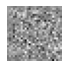

In [6]:
# Set gaussian noise
noise = tf.random.normal(shape = [1, num_features])

# Set generator model
generated_images = generator(noise, training = False)

# Plot image
plot_utils.show(generated_images, 1)

## Build The Discriminator Network For DCGAN

In [7]:
# Create model acrhitecture for discriminator
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, (5, 5), (2, 2), padding = "same", input_shape = [28, 28, 1]),
    keras.layers.LeakyReLU(0.2),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(128, (5, 5), (2, 2), padding = "same"),
    keras.layers.LeakyReLU(0.2),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [8]:
# Set discriminator model
decision = discriminator(generated_images)

# Check decison
print(decision)

tf.Tensor([[0.49766397]], shape=(1, 1), dtype=float32)


## Compile The Deep Convolutional Generative Adversarial Network (DCGAN)

In [9]:
# Compile the model
discriminator.compile(loss = "binary_crossentropy", optimizer = "rmsprop")

# Freeze parameters
discriminator.trainable = False

# GAN model
gan = keras.models.Sequential([generator, discriminator])

# Compile the model
gan.compile(loss = "binary_crossentropy", optimizer = "rmsprop")

## Define Training Procedure

In [10]:
# Import libraries
from IPython import display
from tqdm import tqdm

# Set seed
seed = tf.random.normal(shap e= [batch_size, 100])

In [11]:
# Default function
def train_dcgan(gan, dataset, batch_size, num_features, epochs = 5):
    generator, discriminator = gan.layers
    for epoch in tqdm(range(epochs)):
        print("Epoch {}/{}".format(epoch + 1, epochs))
        for X_batch in dataset:
            noise = tf.random.normal(shape = [batch_size, num_features])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis = 0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            noise = tf.random.normal(shape = [batch_size, num_features])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
            
        # Produce images for the GIF as we go
        display.clear_output(wait = True)
        generate_and_save_images(generator, epoch + 1, seed)
        
    display.clear_output(wait = True)
    generate_and_save_images(generator, epochs, seed)

In [12]:
## Source https://www.tensorflow.org/tutorials/generative/dcgan#create_a_gif
# This function save images every epoch
def generate_and_save_images(model, epoch, test_input):
    
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training = False)

  fig = plt.figure(figsize = (10,10))

  for i in range(25):
      plt.subplot(5, 5, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap = 'binary')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

## Train DCGAN

In [13]:
# Reshape the images
x_train_dcgan = x_train.reshape(-1, 28, 28, 1) * 2. - 1.

In [14]:
# Set batch sizes
batch_size = 32

# This dataset fills a buffer with buffer_size elements, 
# Then randomly samples elements from this buffer, replacing the selected elements with new elements.
dataset = tf.data.Dataset.from_tensor_slices(x_train_dcgan)

# Shuffle the dataset
dataset = dataset.shuffle(1000)

# Mini batch of data
dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)

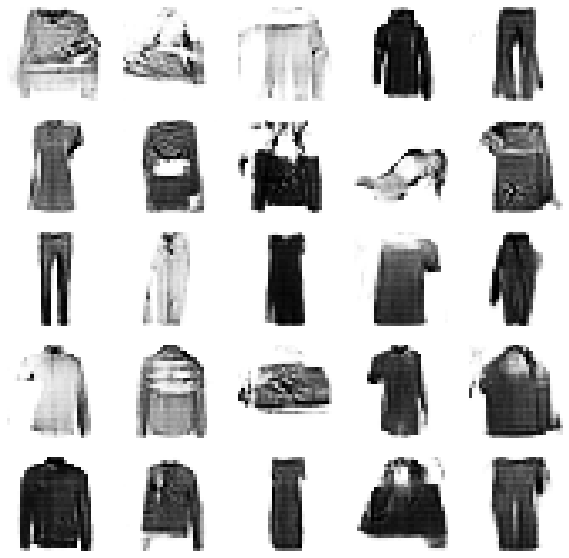

CPU times: user 5min 16s, sys: 19.1 s, total: 5min 35s
Wall time: 5min 49s


In [15]:
# Record trainin time
%%time

# Initiate training
train_dcgan(gan, dataset, batch_size, num_features, epochs=10)

## Generate Synthetic Images With DCGAN

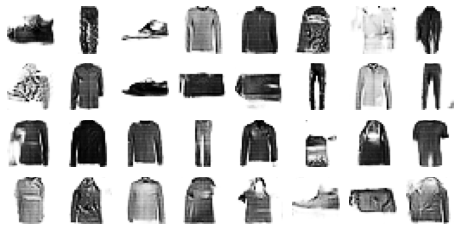

In [16]:
# Set noise
noise = tf.random.normal(shape = [batch_size, num_features])

# Generate noise
generated_images = generator(noise)

# Show generated images
plot_utils.show(generated_images, 8)

In [22]:
# Import library
import imageio
import glob

# Label file
anim_file = 'dcgan.gif'

## Source: https://www.tensorflow.org/tutorials/generative/dcgan#create_a_gif
with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

# # Can't display gif in google colab
# import IPython
# display.Image(filename = anim_file)

## Conclusion

These are the synthetic images generated for every epoch. It can be observed that the machine was somehow able to generate images similar to the original images. This can also be further improve by increasing the iteration in the training phase and including more deeper layers in the model.

<img src="https://github.com/ijoseff/Generate-Synthetic-Images/blob/master/dcgan.gif?raw=true" />